In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.image as mpimg
from matplotlib import colors
from matplotlib.cm import ScalarMappable
from plot_utils import set_size

In [2]:
plt.rcParams['font.size'] = 7                  
plt.rcParams['axes.titlesize'] = 6
plt.rcParams['lines.linewidth'] = 1           
plt.rcParams['lines.markersize'] = 3
plt.rcParams['figure.figsize'] = set_size(252,subplots=(1,1))
plt.rcParams['figure.figsize'] = (plt.rcParams['figure.figsize'][0],plt.rcParams['figure.figsize'][1]/2)
plt.rcParams['xtick.major.size'] = 3
plt.rcParams['xtick.major.width'] = 0.5
plt.rcParams['xtick.minor.size'] = 1.
plt.rcParams['xtick.minor.width'] = 0.5
plt.rcParams['ytick.major.size'] = 3
plt.rcParams['ytick.major.width'] = 0.5
plt.rcParams['ytick.minor.size'] = 1.
plt.rcParams['ytick.minor.width'] = 0.5
plt.rcParams['xtick.major.pad']=1.5
plt.rcParams['ytick.major.pad']=1.5
plt.rcParams['legend.fontsize'] = 7
plt.rcParams['legend.handlelength'] = plt.rcParams['legend.handleheight']
plt.rcParams['legend.columnspacing'] = 0.8
plt.rcParams['legend.handletextpad'] = 0.4

plt.rcParams['axes.linewidth'] = 0.5

fmt = 'eps'

In [3]:
nonlinearity_exp = np.genfromtxt('../data/nonlinearity/measoutfileNLjune.txt')
nonlinearity_input = np.genfromtxt('../data/nonlinearity/inputnonlinearity.txt')
nonlinearity_mask = np.genfromtxt('../data/nonlinearity/masknonlinearity.txt')

data = np.zeros((51200,1))
index=1
for i in range(1023):
    for j in range(50):
        data[index]=nonlinearity_input[i]*nonlinearity_mask[j]
        index=index+1

model=2.189*nonlinearity_input/(1+np.power(0.001839*nonlinearity_input,10.37))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


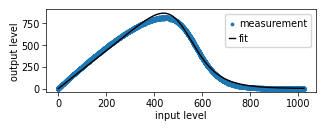

In [4]:
if fmt == 'pdf':
    raster = True
    dpi = 300
elif fmt == 'eps':
    raster = False
    dpi = None


fig = plt.figure()
ax = fig.gca()

ax.scatter(data,nonlinearity_exp,label='measurement',rasterized=raster,s=3)
ax.plot(model,color='black',label='fit',rasterized=raster)
ax.set_xlabel('input level',labelpad=1)
ax.set_ylabel('output level',labelpad=1)

ax.legend()

plt.savefig(fmt+'/fig11_mg_nonlinearity.'+fmt,dpi=dpi,bbox_inches='tight')